In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [3]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

(1024, 1024, 3)
[[163.22523269 197.72077299 120.58292219]
 [107.68180177  95.55200125  71.59172666]]


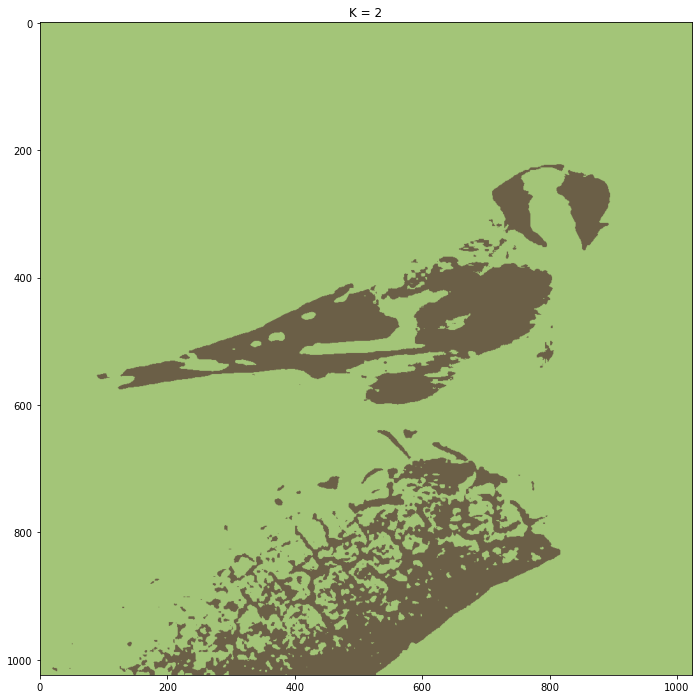

In [8]:
h, w, c = img.shape
print(img.shape)
Z = img.reshape((-1, 3))
K = 2
label, center = km_clust(Z, K)
center = np.uint8(center[:,:3])
res = center[label.flatten()]
res = res.reshape(img.shape)

plt.figure(figsize = (16, 12))
plt.title("K = {}".format(K))
plt.imshow(res)

## 1-2. cluster with RGB values and the location

[[156.41874365 180.26221176 110.36672394 511.33454152 766.3288683 ]
 [154.46721059 186.5947238  117.10938874 511.66697835 254.33031802]]
[[157.1244625  179.00353554 122.83905454 768.70429119 256.09863585]
 [157.30769113 183.18520425 111.45820367 766.71485448 768.31060086]
 [155.5929988  177.56706337 109.38834201 255.0441451  766.26049722]
 [151.76826771 193.89622652 111.23019544 256.38926494 254.48552579]]
[[161.12119795 186.06630332 117.19789315 240.90109071 874.65276337]
 [144.10698624 143.05212732 102.22639842 860.4800642  532.35993872]
 [143.63868018 143.42567175  97.96453389 514.58645355 597.62880582]
 [162.51335803 206.99818121 118.16646682 775.649323   876.92499832]
 [152.10979557 194.28367908 111.61122944 170.19734525 171.56188264]
 [154.9419472  199.80851808 116.07555499 511.06763397 202.42250942]
 [157.88239529 199.3054068  110.20132105 170.95430922 525.27192184]
 [165.11537356 188.98604346 135.37653099 848.86557687 174.22744486]]
[[156.13800983 202.10899578 116.24803001 625.

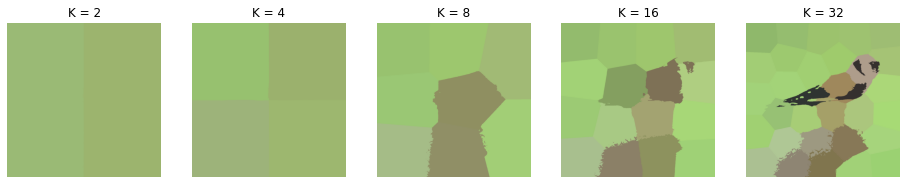

In [9]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)